In [1]:
import tensorflow
from tensorflow import keras

2024-04-26 19:46:34.161766: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 19:46:34.161793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 19:46:34.162455: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 19:46:34.166762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 19:46:34.987390: W tensorflow/compiler/tf2

In [2]:
from matplotlib import pyplot as plt

In [3]:
batch_size = 128
num_class = 10
epochs = 20

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
keras.backend.image_data_format()  # CNN の最後の要素が channel

'channels_last'

In [8]:
import numpy as np

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [9]:
print(type(x_train))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


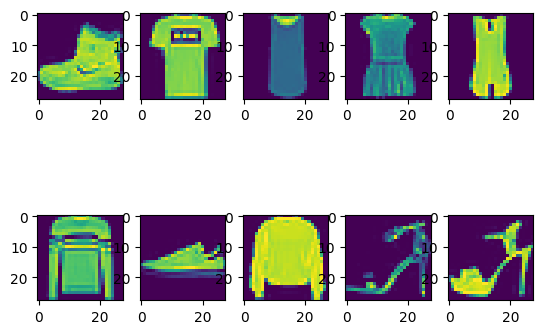

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28))

In [11]:
x_train, x_test = x_train / 255., x_test / 255.

畳み込みカーネル $(5, 5, 32, 64)$ の部分のイメージを忘れかけてた。 32 channel それぞれに対して、 64 枚のカーネルを用意する。

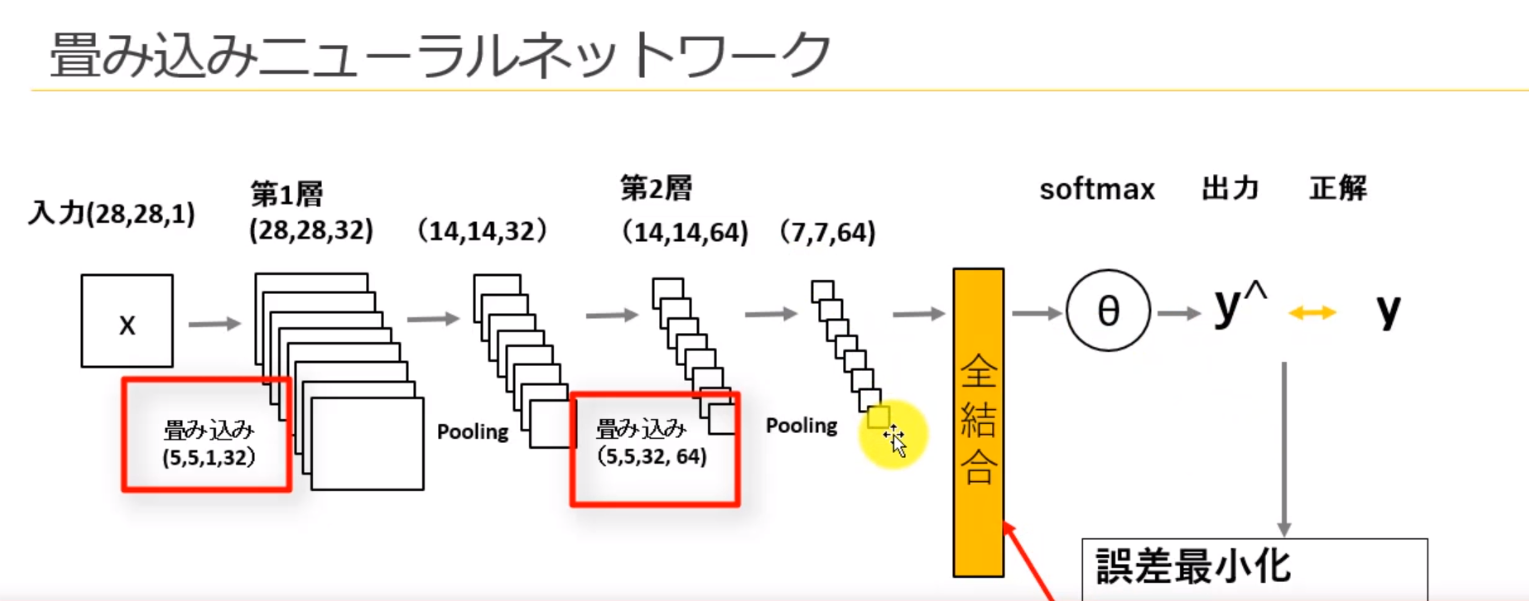

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1),
                       ),
    keras.layers.Conv2D(64, kernel_size=(3, 3),
                        activation='relu',
                       ),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax'),
])

2024-04-26 19:46:39.873804: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 19:46:39.910566: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-26 19:46:39.910733: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2024-04-26 19:46:42.430523: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-26 19:46:42.503505: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-26 19:46:43.267639: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3e35b3e260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-26 19:46:43.267668: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-04-26 19:46:43.271717: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714128403.371816    2843 device_compiler.h:186] Compiled cluster using XL

1875/1875 [==============================] - 8s 3ms/step - loss: 0.4696 - accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9032
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9139
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2156 - accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1963 - accuracy: 0.9284
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1796 - accuracy: 0.9324
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1703 - accuracy: 0.9366
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1605 - accuracy: 0.9398
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1451 - accurac

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2579 - accuracy: 0.9142


[0.2579082250595093, 0.9142000079154968]

1/1 [==============================] - 0s 120ms/step


array([[1.0140170e-10, 6.1645746e-13, 1.0409261e-11, 5.4650564e-12,
        3.3240312e-12, 4.8979396e-06, 1.4616389e-10, 1.6596631e-06,
        2.0135889e-10, 9.9999344e-01],
       [1.6274228e-06, 1.2630161e-17, 9.9999833e-01, 1.6325009e-10,
        5.5006057e-09, 4.8784363e-17, 2.0353673e-08, 8.4024270e-20,
        1.3086769e-11, 6.1963880e-20],
       [5.7088340e-17, 1.0000000e+00, 1.4538289e-19, 1.4259657e-18,
        1.9492657e-17, 1.2001857e-22, 1.9867555e-18, 2.5154368e-24,
        5.2686419e-17, 3.2256548e-28]], dtype=float32)

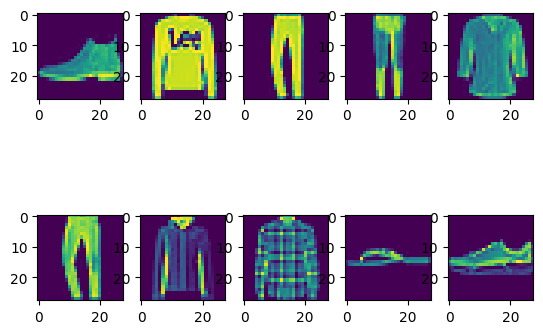

In [16]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
model.predict(x_test[:3])